In [2]:
import os
import sys
import numpy as np
import pandas
import matplotlib.pyplot as plt
sys.path.append('/home/kumarv/khand035/.conda/envs/gdalenv/lib/python2.7/site-packages/')
from osgeo import gdal,ogr

%matplotlib inline

In [3]:
# Prerequisites: python 2.7 or later
import requests
import json
# For real interactions with the data catalog, use api.mint-data-catalog.org
url = "https://sandbox.mint-data-catalog.org"
# When you register datasets or resources, we require you to pass a "provenance_id". This a unique id associated
# with your account so that we can keep track of who is adding things to the data catalog. For sandboxed interactions
# with the data catalog api, please use this provenance_id:
#provenance_id = "e8287ea4-e6f2-47aa-8bfc-0c22852735c8"
provenance_id = "5656c93c-895e-41b7-aa8d-09053e4ae4d1"
# Step 1: Get session token to use the API
resp = requests.get(url + '/get_session_token').json()
#print(resp)
api_key = resp['X-Api-Key']

request_headers = {
    'Content-Type': "application/json",
    'X-Api-Key': api_key
}

In [4]:
# Now we can search for data
# 1) Searching by standard_names

search_query_1 = {
    "standard_variable_names__in": ["River_Width_Standard_Variable"]
}

resp = requests.post(url + '/datasets/find', 
                                        headers=request_headers,
                                        json=search_query_1).json()
if resp['result'] == 'success':
    found_resources = resp['resources']
    print('Found ' + str(len(found_resources)) + ' resources')
    for i in range(0,len(found_resources)):
        print 'Resource: ' + str(i) + '\n'
        print found_resources[i]
        print '\n'
    

Found 8 resources
Resource: 0

{u'resource_data_url': u'http://workflow.isi.edu/scratch/ankush/DemoBoxes-1.tar.gz', u'resource_name': u'DemoBoxes-1.tar.gz', u'resource_id': u'09649ab3-464e-4df9-85b3-77291336855d', u'dataset_id': u'3094dcb9-1fc8-452a-8ade-cab18545c93f', u'resource_metadata': {u'spatial_coverage': {u'type': u'BoundingBox', u'value': {u'xmin': 8.9030533382, u'ymin': 27.6811201734, u'ymax': 27.6864686383, u'xmax': 8.9071260225}}, u'temporal_coverage': {u'start_time': u'2017-01-04T03:57:38', u'end_time': u'2017-12-30T03:57:45'}}, u'dataset_name': u'River Width Variation'}


Resource: 1

{u'resource_data_url': u'http://workflow.isi.edu/scratch//test.csv', u'resource_name': u'test.csv', u'resource_id': u'1528e863-2184-4708-bf0e-78023081f932', u'dataset_id': u'3094dcb9-1fc8-452a-8ade-cab18545c93f', u'resource_metadata': {u'spatial_coverage': {u'type': u'BoundingBox', u'value': {u'xmin': 8.9030533382, u'ymin': 27.6811201734, u'ymax': 27.6864686383, u'xmax': 8.9071260225}}, u'te

In [13]:
data_url = found_resources[0]['resource_data_url']
data_name = found_resources[0]['resource_name']
#data_url = "http://workflow.isi.edu/scratch/ankush/GEETest3-1.tar.gz"
#data_name = "GEETest3-1.tar.gz"
#print data_url
!rm -rf testdir2
!mkdir testdir2
!rm -rf *.tar.gz
os.system('wget ' + data_url)
os.system('tar -xvzf ' + data_name + ' -C testdir2')
for temp in os.listdir('testdir2'):
    data_dir = os.getcwd() + '/testdir2/' + temp + '/'
#!ls
print data_dir
os.system('ls ' + data_dir)

rm: cannot remove `testdir2/DemoBoxes-1/.panfs.8031f0a.1543588987416000': Device or resource busy
rm: cannot remove `testdir2/DemoBoxes-1/.panfs.8031f0a.15435889877759000': Device or resource busy
mkdir: cannot create directory `testdir2': File exists
/panfs/roc/groups/6/kumarv/khand035/Projects/MINT/river-depth-estimation/scripts/testdir2/DemoBoxes-1/


0

In [14]:
rasterFormat = 'GTiff' # for now assuming output format is going to GTiff
rasterDriver = gdal.GetDriverByName(rasterFormat)

In [15]:
df = pandas.read_csv(data_dir + 'timeseries.txt',names=['Time','River Width'])
df

,Time,River Width
0,2017-01-04T03:57:38,430
1,2017-01-16T03:57:37,455
2,2017-01-28T03:57:37,589
3,2017-02-09T03:57:37,634
4,2017-02-21T03:57:37,578
5,2017-03-05T03:57:37,648
6,2017-03-17T03:57:37,727
7,2017-03-29T03:57:37,831
8,2017-04-10T03:57:38,755
9,2017-04-22T03:57:38,1024


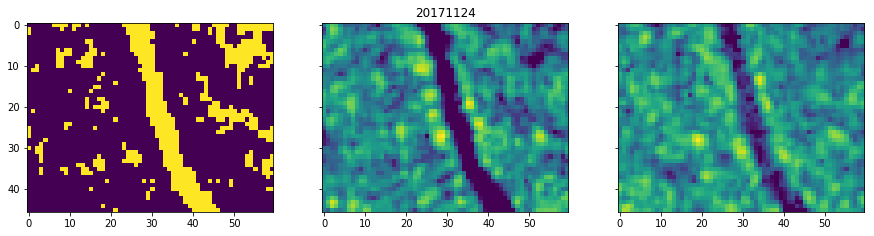

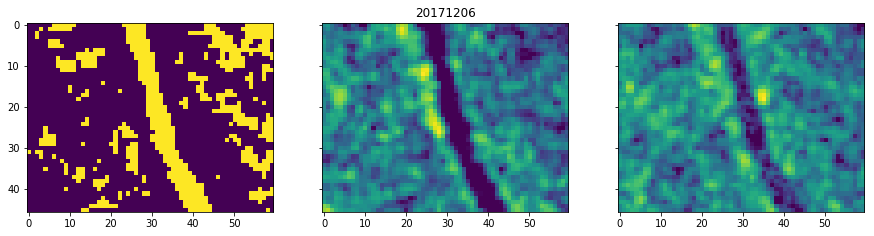

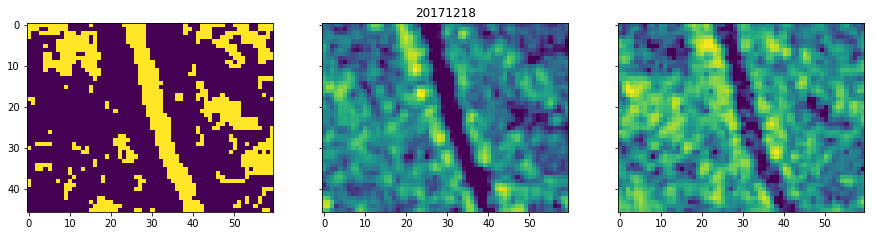

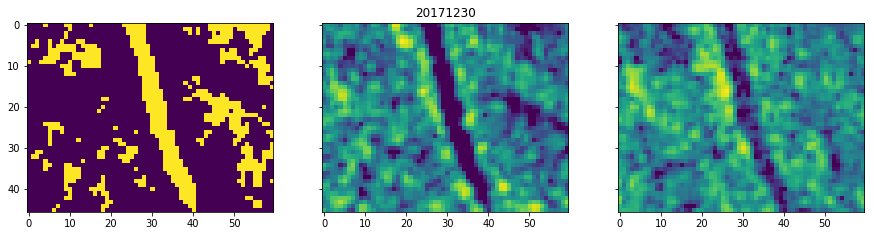

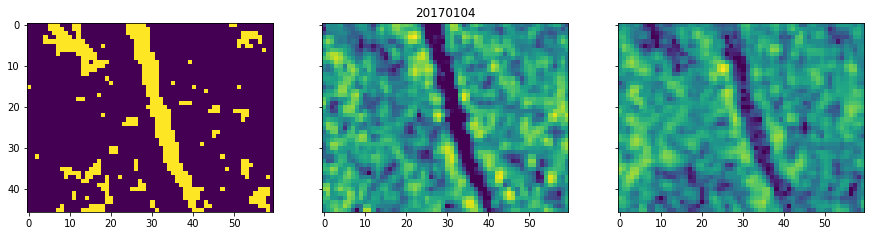

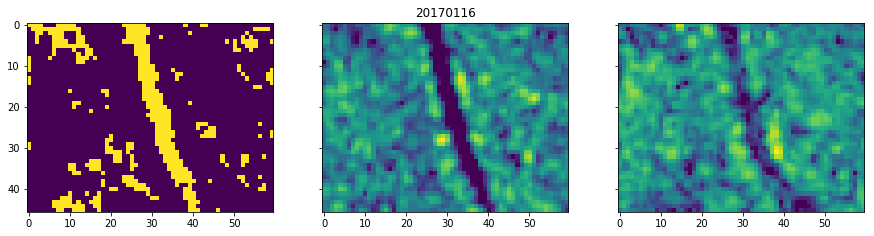

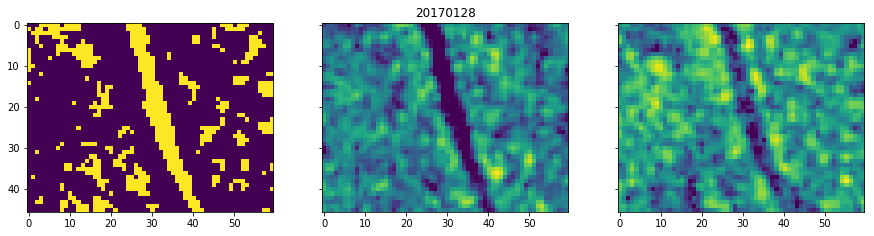

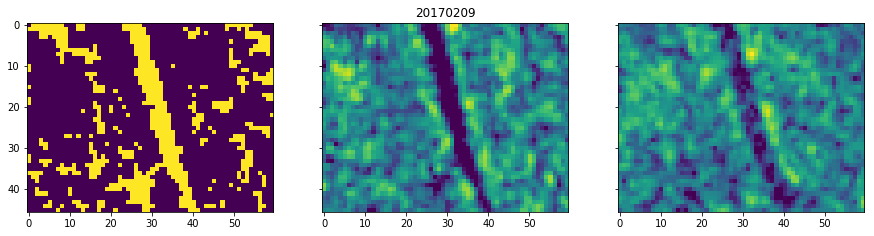

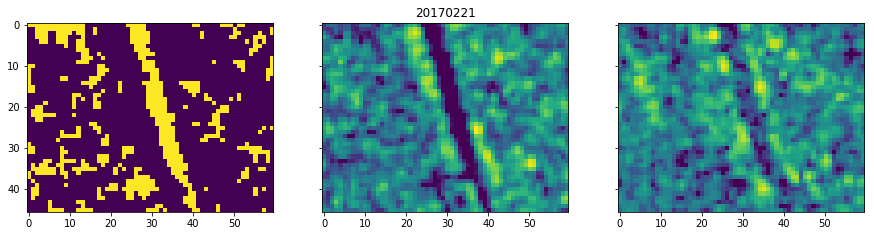

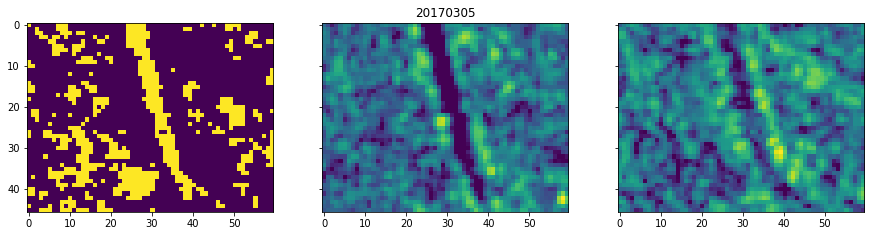

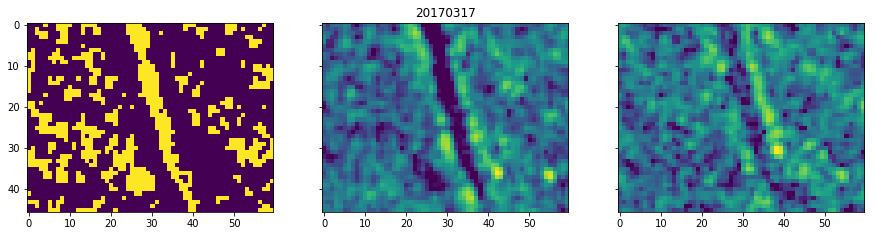

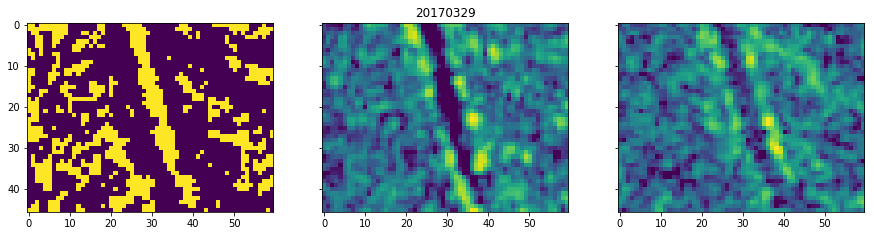

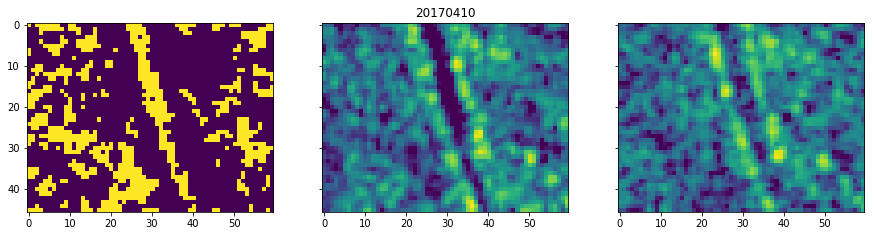

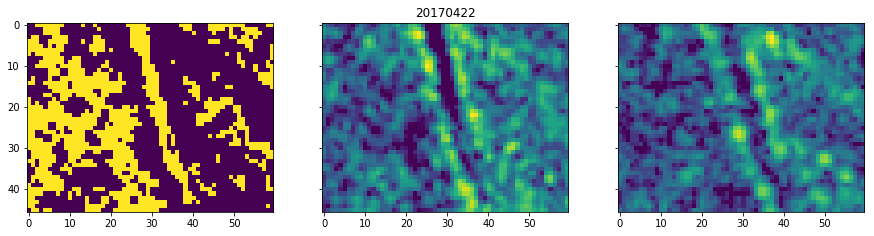

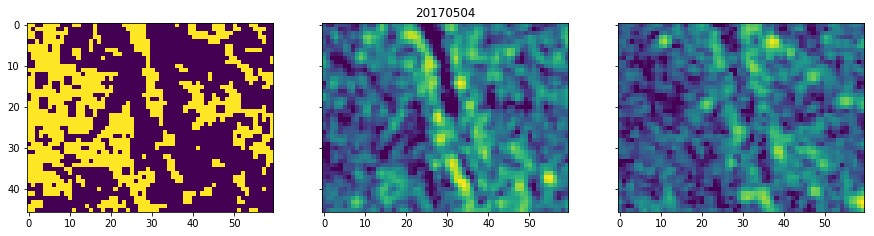

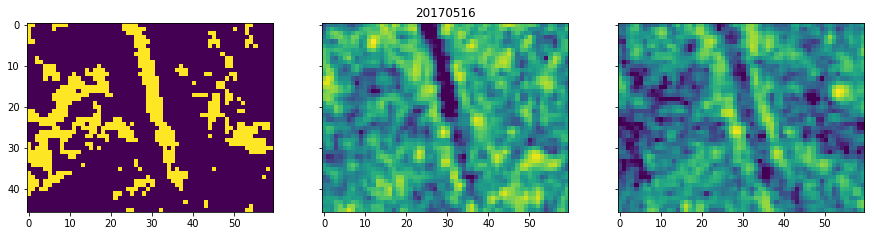

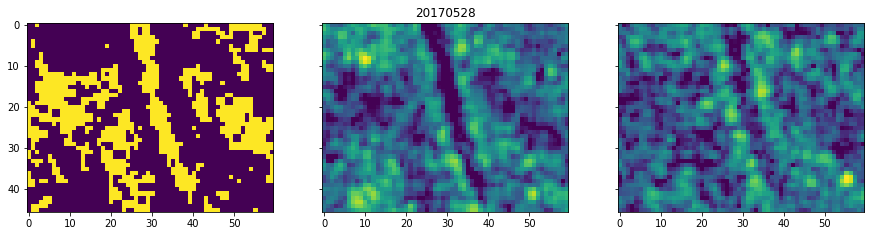

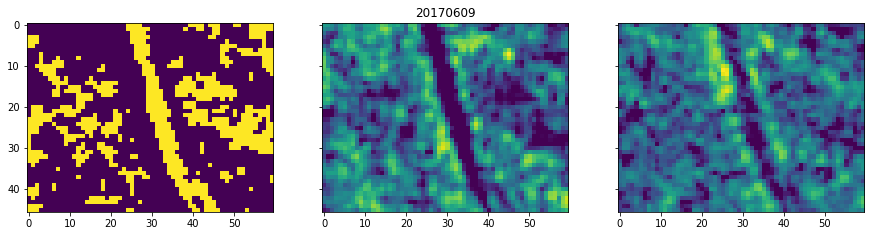

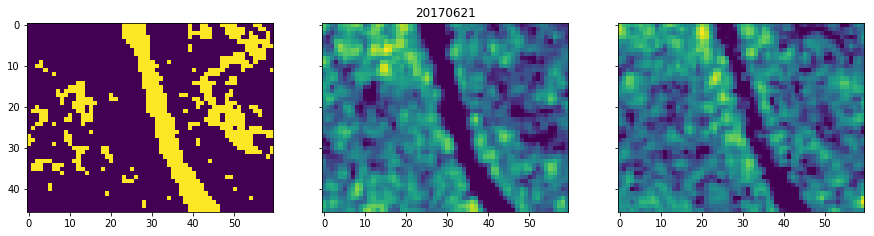

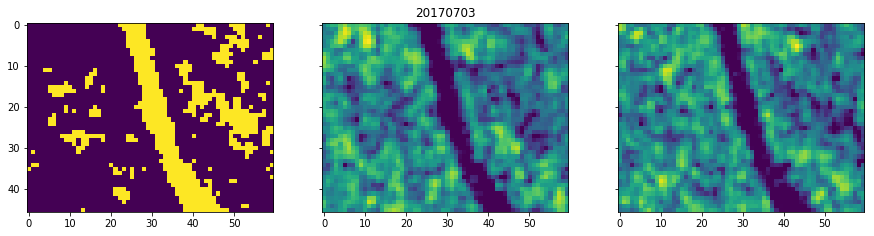

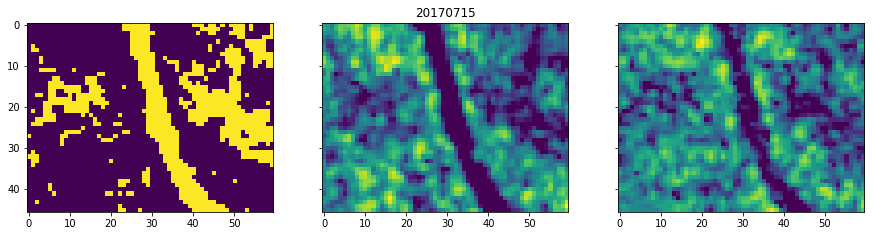

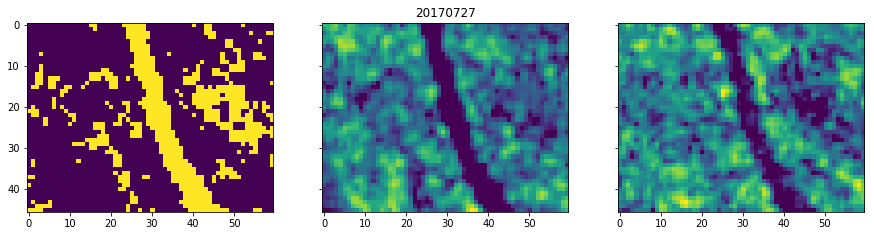

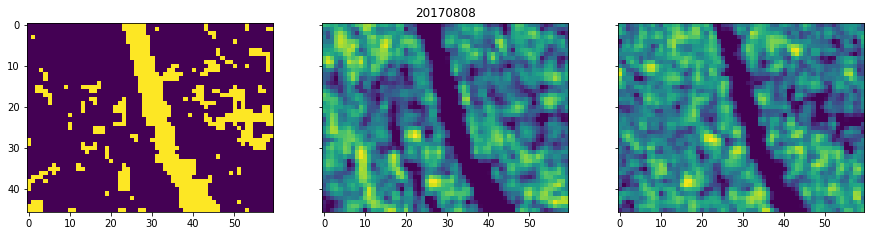

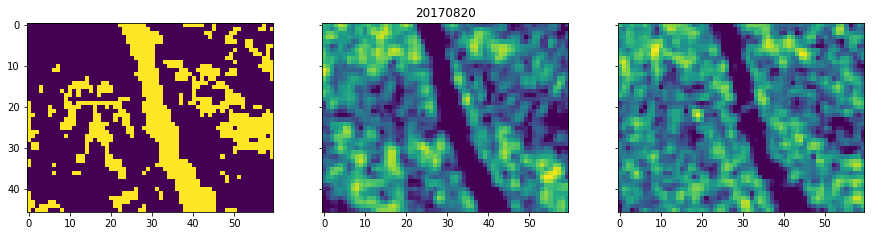

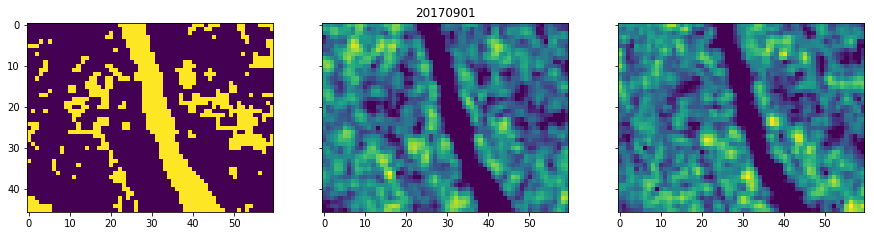

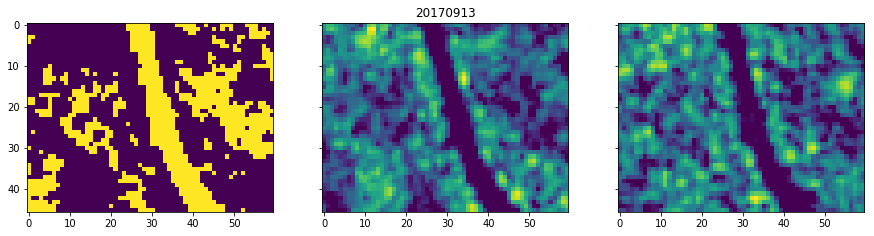

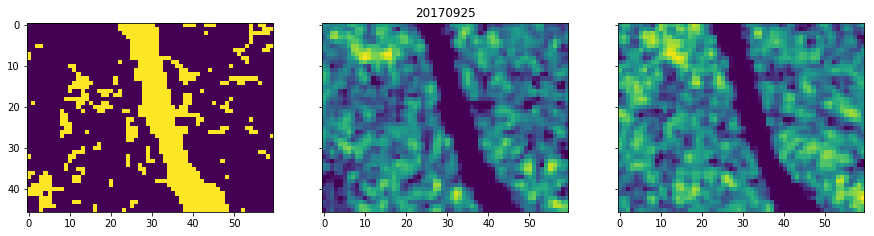

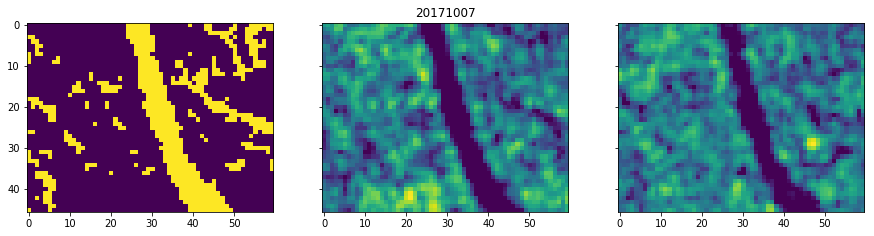

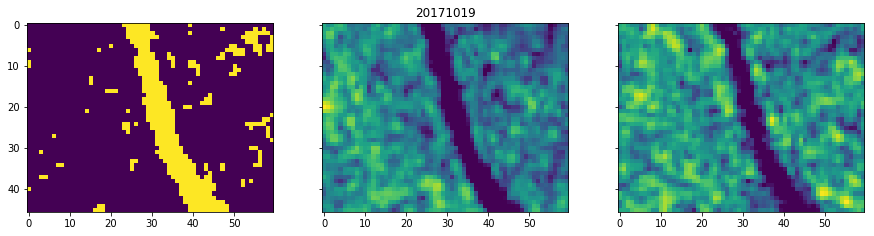

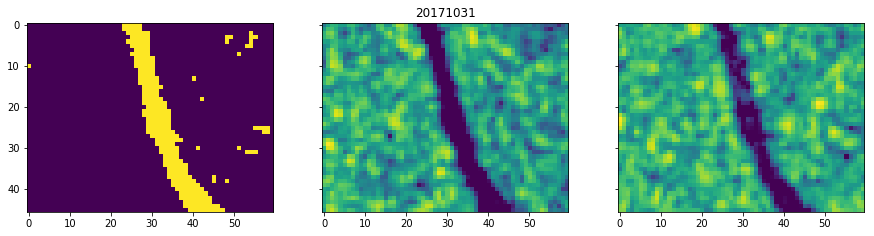

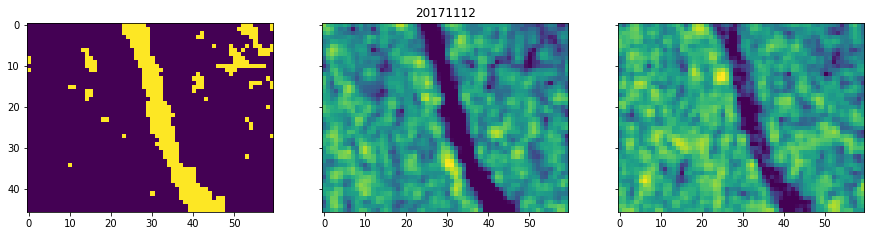

In [19]:
flag = 0
for mask in os.listdir(data_dir):
    if mask[0:2] == '20':
        for vvtif in os.listdir(data_dir):
            if mask[0:-4] in vvtif and 'VV' in vvtif and vvtif.endswith('tif'):
                break
        #print vvtif
        for vhtif in os.listdir(data_dir):
            if mask[0:-4] in vhtif and 'VH' in vhtif and vhtif.endswith('tif'):
                break
        #print vhtif
        ds = gdal.Open(data_dir + mask)
        vvs = gdal.Open(data_dir + vvtif)
        vhs = gdal.Open(data_dir + vhtif)
        
        numchannels = ds.RasterCount
        cols = ds.RasterXSize
        rows = ds.RasterYSize
        mask_arr = np.array(ds.GetRasterBand(1).ReadAsArray())
        vvs_arr = np.array(vvs.GetRasterBand(1).ReadAsArray())
        vhs_arr = np.array(vhs.GetRasterBand(1).ReadAsArray())
        if flag==0:
            mask_sum = mask_arr
            flag = 1
        else:
            mask_sum = mask_sum + mask_arr

        f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True,figsize=(15,10))
        ax1.imshow(mask_arr)
        ax2.imshow(vvs_arr)
        ax2.set_title(mask[0:8])
        ax3.imshow(vhs_arr)

        

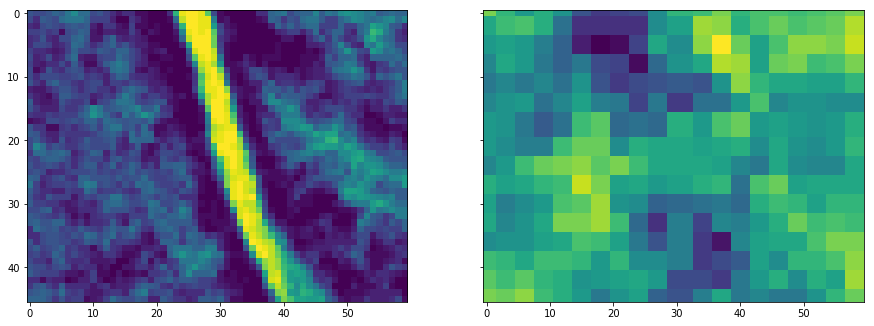

In [18]:
ds = gdal.Open(data_dir + 'dem.tiff')
dem_arr = np.array(ds.GetRasterBand(1).ReadAsArray())
f, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True,figsize=(15,10))
ax1.imshow(mask_sum)
ax2.imshow(dem_arr)
        

In [15]:
os.system('rm -rf testdir*')
os.system('rm -rf *.tar.gz*')

CatalogSearch.ipynb  ParseXML.py~		 file-list-2.txt
ClipDEM.py	     ProcessZip.py		 file-list-3.txt
ClipDEM.py~	     ProcessZip.pyc		 file-list-4.txt
ClipZip.py	     ProcessZip.py~		 file-list-5.txt
ClipZip.py~	     ProcessZip_wrapper.py	 file-list-all.txt
DownloadZips.py      ProcessZip_wrapper.py~	 file-list-all2.txt
DownloadZips.py~     VisualizeRiverWidths.ipynb  main-wrapper.sh
GEEClipDEM.py	     catalog.py			 status.txt
GEEClipDEM.py~	     code_test1.txt		 testdir
GEEScript.py	     credentials.txt
ParseXML.py	     file-list-1.txt


In [ ]:
ds = gdal.Open(data_dir + 'dem.tif')